In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

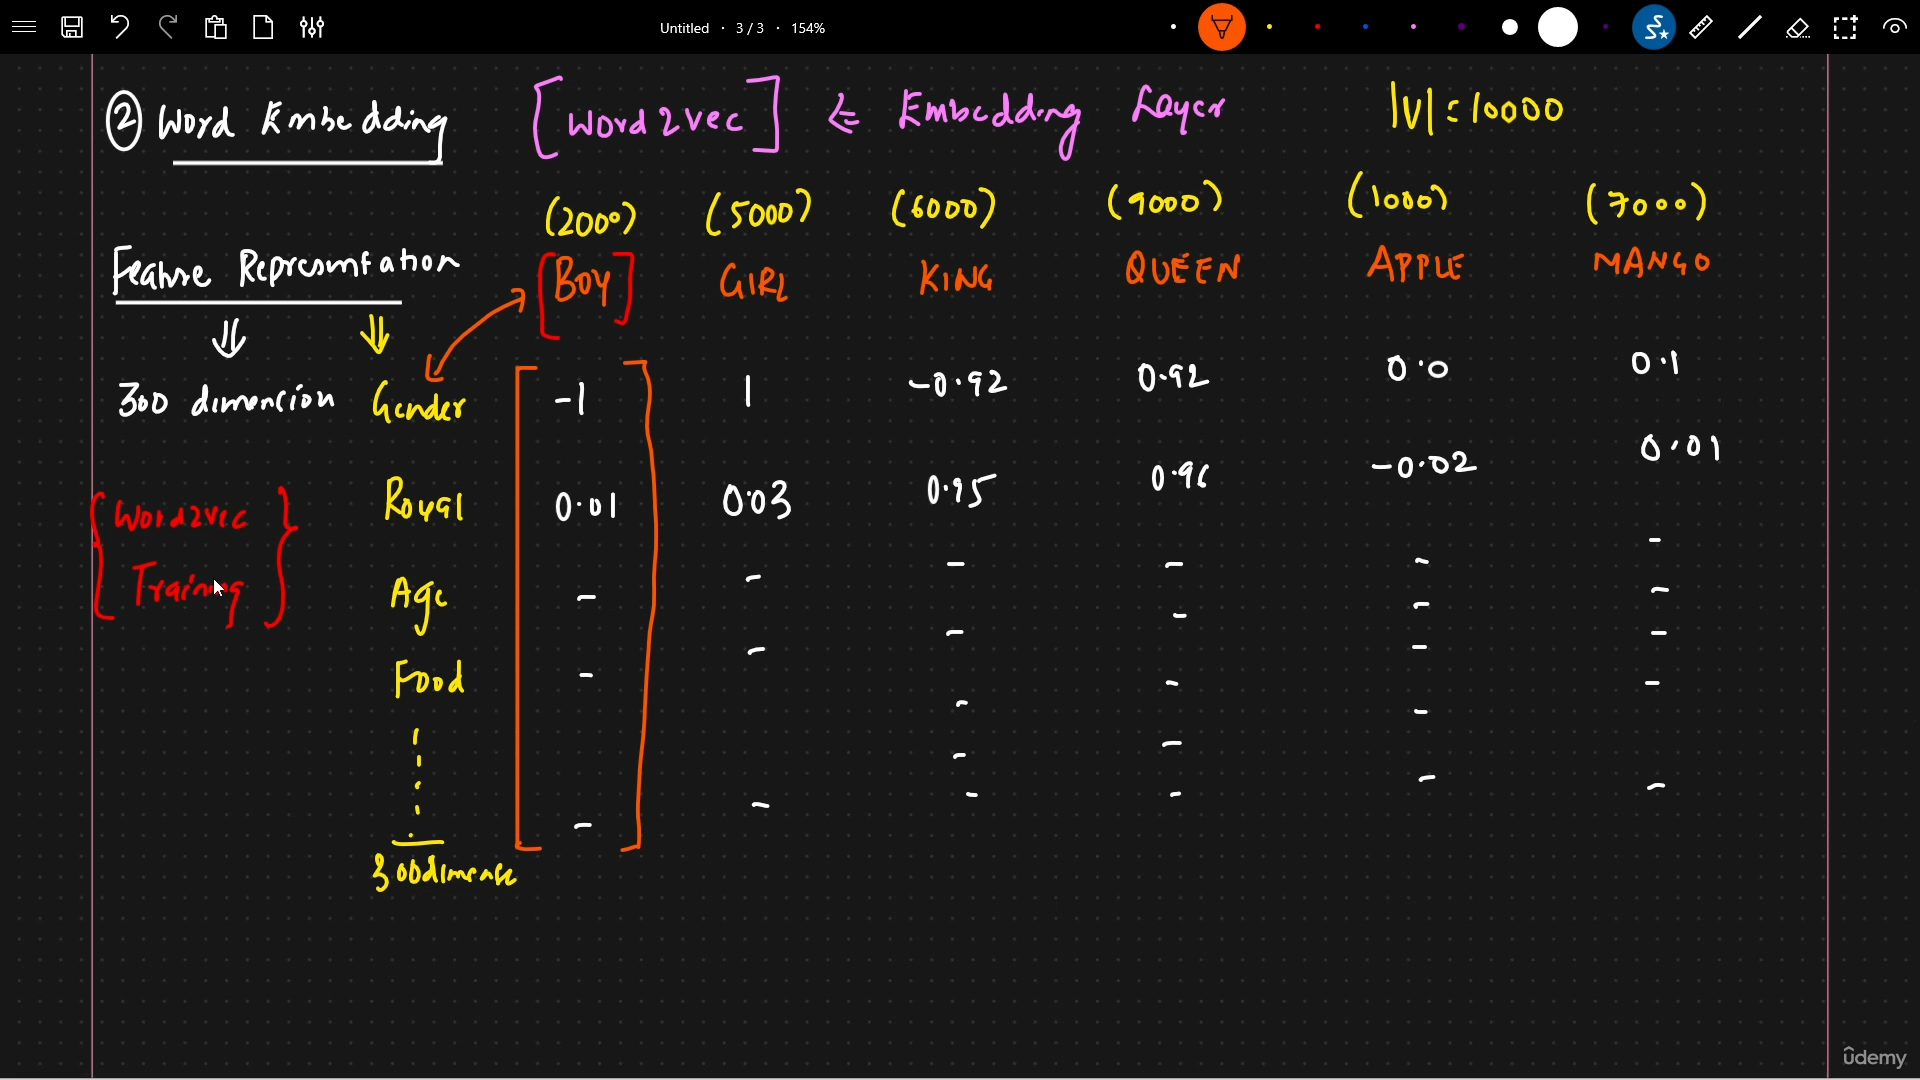

In [2]:
# !pip install openvino==2024.3.0

# Word Embeddings

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from tensorflow.keras.preprocessing.text import one_hot

In [6]:
### sentences
sent=[ 'the glass of water',
     'the glass of alcohol',
     'the cup of tea',
    'I am a good boy',
     'I am a developer',
     'understand the meaning of life',
     'your videos are good',]

In [7]:
## Define the vocabulary size
voc_size=10000

In [8]:
### One Hot Representation
one_hot_repr=[one_hot(words,voc_size)for words in sent]
one_hot_repr

[[9060, 9073, 4130, 5899],
 [9060, 9073, 4130, 3020],
 [9060, 257, 4130, 489],
 [1379, 7371, 3560, 7692, 44],
 [1379, 7371, 3560, 2747],
 [883, 9060, 1962, 4130, 7023],
 [848, 8030, 1545, 7692]]

In [9]:
## word Embedding Representation

from tensorflow.keras.layers import Embedding
#from tensorflow.keras.processing.sequence import pad_sequences
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential

In [10]:
sent_length=8
embedded_docs=pad_sequences(one_hot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0 9060 9073 4130 5899]
 [   0    0    0    0 9060 9073 4130 3020]
 [   0    0    0    0 9060  257 4130  489]
 [   0    0    0 1379 7371 3560 7692   44]
 [   0    0    0    0 1379 7371 3560 2747]
 [   0    0    0  883 9060 1962 4130 7023]
 [   0    0    0    0  848 8030 1545 7692]]


In [11]:
## feature representation
dim=20

In [12]:
model=Sequential()
model.add(Embedding(voc_size,dim,input_length=sent_length))
model.compile('adam','mse')

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.predict(embedded_docs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


array([[[ 0.03364507,  0.00179673,  0.04864195, ...,  0.03429261,
         -0.03832533, -0.0404827 ],
        [ 0.03364507,  0.00179673,  0.04864195, ...,  0.03429261,
         -0.03832533, -0.0404827 ],
        [ 0.03364507,  0.00179673,  0.04864195, ...,  0.03429261,
         -0.03832533, -0.0404827 ],
        ...,
        [ 0.00631707,  0.03955035,  0.01390196, ..., -0.00893322,
          0.03605372, -0.03803705],
        [ 0.01964695, -0.04880675, -0.00031706, ...,  0.0171492 ,
         -0.0444289 ,  0.043002  ],
        [ 0.02454238,  0.04354003,  0.04890389, ..., -0.03785871,
         -0.03372959, -0.01581234]],

       [[ 0.03364507,  0.00179673,  0.04864195, ...,  0.03429261,
         -0.03832533, -0.0404827 ],
        [ 0.03364507,  0.00179673,  0.04864195, ...,  0.03429261,
         -0.03832533, -0.0404827 ],
        [ 0.03364507,  0.00179673,  0.04864195, ...,  0.03429261,
         -0.03832533, -0.0404827 ],
        ...,
        [ 0.00631707,  0.03955035,  0.01390196, ..., -

# Simple RNN

In [3]:
# !pip install tensorflow

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from tensorflow.keras.datasets import imdb

2024-09-16 15:37:27.027954: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-16 15:37:27.028518: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-16 15:37:27.030971: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-16 15:37:27.037478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-16 15:37:27.047693: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [6]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence

In [7]:
max_feature = 10000  # vocabulary size

In [8]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= max_feature)

In [9]:
x_train  # this will be one hot representation of every word (each index represents 1 word)

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [10]:
set(y_train)

{0, 1}

In [11]:
# mapping of word index

word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
# padding
# making every word vector of same length

max_len = 500

x_train = sequence.pad_sequences(x_train, max_len)
x_test = sequence.pad_sequences(x_train, max_len)

In [13]:
# train simple rnn

In [14]:
model = Sequential()

In [15]:
# embedding layer
model.add(Embedding(max_feature, 128, input_length = max_len))

In [16]:
model.add(SimpleRNN(128, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# create an instance of early stopping callback

from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stopping = EarlyStopping(monitor= 'val_loss', 
                               patience=  5, restore_best_weights= True)

In [21]:
# train

model.fit(
    x_train, y_train, epochs = 10, validation_split = 0.2,
    batch_size = 32, callbacks = [early_stopping]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.5617 - loss: 2154440.5000 - val_accuracy: 0.6134 - val_loss: 0.6472
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6827 - loss: 0.5948 - val_accuracy: 0.7518 - val_loss: 0.5169
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8021 - loss: 0.4352 - val_accuracy: 0.7848 - val_loss: 0.4701
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8667 - loss: 0.3301 - val_accuracy: 0.8006 - val_loss: 0.4611
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8605 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.4987 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.4946 - loss: nan - val_accuracy: 0.5062 - val_loss: nan
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.4980 - loss: nan - val_accuracy: 0

In [22]:
# save the model

model.save('simple_rnn_imdb2.h5')